In [71]:
from pathlib import Path
import sys

sys.path.insert(0, str(Path.cwd().parent))
from util.py3 import from_xyz_block

xyz_file = Path("/home/tns97255/C5O-Kinetics/calc/87/40480759/calc.010.xyz")
from_xyz_block(xyz_file.read_text())

xyz_file = Path("/home/tns97255/C5O-Kinetics/calc/87/40480759/calc.011.xyz")
from_xyz_block(xyz_file.read_text())


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

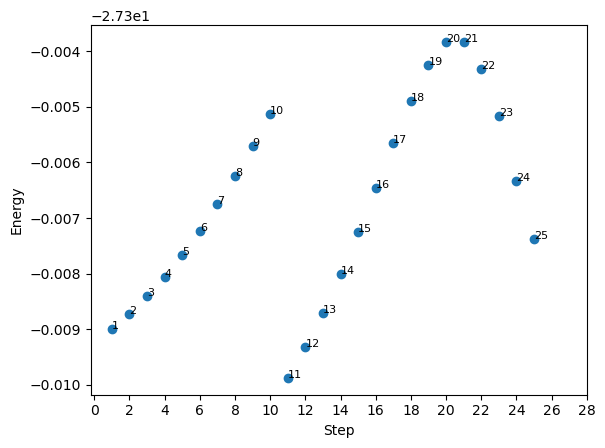

20

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import math

# choose point 16
# energies = [-19.23064422116, -19.22912615765, -19.22749250305, -19.22574686055, -19.2238952175, -19.22194414825, -19.21990555493, -19.21779076653, -19.21561698399, -19.21340808793, -19.21118272465, -19.20897922585, -19.20683473497, -19.20480768978, -19.20297129845, -19.2014571431, -19.22459820942, -19.22973593457, -19.23479399742, -19.2397099536, -19.24437402342, -19.24866856472, -19.25246563572, -19.25561609073, -19.25793951825]
# choose point 17
# energies = [-19.23906320112, -19.23840872989, -19.23771229769, -19.23697793433, -19.23620277628, -19.23539332107, -19.23454979561, -19.23367832729, -19.23278578138, -19.23187923448, -19.23097037002, -19.23007398287, -19.22920963915, -19.22840338587, -19.22768973506, -19.22711417423, -19.22674155344, -19.22672468109, -19.22740137381, -19.23032745866, -19.23494980075, -19.23921634608, -19.24299368085, -19.24612889033, -19.24843916281]
# choose point 17
energies = [-27.30900125367, -27.30872409691, -27.30840883336, -27.30805459285, -27.30766105816, -27.30722818067, -27.30675648019, -27.30624753041, -27.30570446053, -27.30513562213, -27.30987660692, -27.30932777997, -27.308705, -27.30801327889, -27.30725824926, -27.30646378289, -27.30565767359, -27.30489555226, -27.30425375265, -27.30384136689, -27.3038344503, -27.30432278767, -27.30515833473, -27.30633346241, -27.3073831499]
steps = [i for i in range(1, len(energies) + 1)]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(steps, energies, marker="o", linestyle="None")
for x, y in zip(steps, energies):
    ax.text(x, y, f"{x}", fontsize=8)
ax.set_xlabel("Step")
ax.set_ylabel("Energy")
ax.set_xticks([2 * i for i in range(0, 15)])
plt.show()

def identify_ts_index(energies: list[float]) -> int:
    first_derivative = np.gradient(energies)
    second_derivative = np.gradient(first_derivative)

    # Local maxima (sudden drop)
    energy_diffs = np.diff(energies)
    sudden_drop_indices = np.where(energy_diffs < -0.002)[0]

    # Local maxima (concave down)
    first_signs = np.sign(first_derivative)
    cp_indices = np.where(np.diff(first_signs) < 0)[0]

    # Inflection point
    second_signs = np.sign(second_derivative)
    flip_indices = np.where(np.diff(second_signs) < 0)[0]

    for idx in cp_indices:
        if second_derivative[idx] < 0:
            if idx + 1 not in sudden_drop_indices:
                return idx + 1

    for idx in sudden_drop_indices:
        # Prefer the point AFTER the drop, if concave down
        if 0 < idx + 1 < len(second_derivative) - 1:
            if (
                second_derivative[idx] < 0
                and second_derivative[idx + 1] < 0
            ):
                return idx + 1

    if len(flip_indices):
        idx = flip_indices[0]
        return idx + 1

    # -------- Fallback: Max energy --------
    return int(np.argmax(energies))


ts_idx = identify_ts_index(energies)
selected_step = steps[ts_idx]
selected_step